<a href="https://colab.research.google.com/github/michellelee27/School/blob/main/Exercise_1_Area_of_a_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michelle Lee
<br>
Date: Jan. 10, 2024
<br>
PHYS 2030 W24


## <center><font color=#46769B>Exercise 1: Area of a circle</font></center>

__Rubric (100 points total):__

- Part (a) - __40 points__
     
- Part (b) - __20 points__

- Part (b) - __40 points__

## <font color=#46769B>Introduction:</font>

Here is a classic exercise to estimate $\pi$ by calculating the area of a circle. Consider the following figure. We have a circle of radius $r=1$, centered at the origin. The circle is inscribed inside a square, whose corners are at the points $(x,y) = (\pm 1, \pm 1)$.

<img src="https://drive.google.com/uc?export=view&id=1FOZfIIlRF5bkZjMyRW-OKCpWtvX55g_O" width=350px>

We make a Monte Carlo simulation of $N$ random points within the square by sampling for $x$ and $y$, each sampled from a uniform distribution between

$$-1 \le x,y \le +1 \, .$$

Each sample here will consist of two values $x_i, y_i$, each chosen randomly.

Now, consider the probability $p$ that our sampled point lies within a circle, satisfying

$$\sqrt{x_i^2 + y_i^2} < 1 \, .$$

This probability $p$ is equal to the ratio of the areas:

$$p = \frac{\rm area \; of \; circle}{\rm area \; of \; square} = \frac{\pi}{4} \, . \qquad (1) $$

For our simulation, we expect that the number of sampled points inside the circle is

$$N_{\rm in} \approx p N \, , \qquad (2) $$

becoming a better approximation as $N$ becomes larger. Combining (1) and (2), we have an estimate for $\pi$

$$\pi \approx \frac{4 N_{\rm in}}{N} \, , \qquad (3)$$

which we expect to be more and more accurate as $N$ gets large. Further reading on this problem can be found [here](https://academo.org/demos/estimating-pi-monte-carlo/) and [here](https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/).

Our goals for this exercise are:
- Use Monte Carlo sampling to make a numerical estimation for $\pi$ based on the area of a circle
- Gain practice with writing functions
- Gain practice with `numpy` and `matplotlib`

Required reading:
- *Lesson 1: Introduction to Monte Carlo sampling*

</font>

## <font color=#46769B>Part (a): Calculate $\pi$</font>

Define a function `calculate_pi(num)` using a `def` statement that implements the above logic.

- Your function should take as an input `num` which represents the number $N$ of random points $x_i,y_i$.

- Each $x_i$ and $y_i$ are chosen randomly from a uniform distribution between $-1$ and $+1$.

- You may use the function `numpy.random.uniform` to generate random numbers (see documentation [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)).

- Count $N_{\rm in}$, the number of those points (samples) that fall within the unit circle.

- Estimate $\pi$ as $4 N_{\rm in}/N$ according to Eq. (3), and return that value.

Run your code for $N=10^3$ and print the result. Check that your code returns a value close to the accepted value of $\pi$.


In [1]:
import numpy as np # Importing the numpy library

# Your code here

num = 10 ** 3 # Setting Number of Samples

def calculate_pi(num):

    x = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1
    y = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1

    n_in = 0 # setting counter

    for i in range(num): # Use a For Loop to check every sample

        xi = x[i]
        yi = y[i]

        if 1 > x[i] ** 2 + y[i] ** 2:
            n_in = n_in + 1

    pi = (4 * n_in) / num

    print("The Number of Points Inside the Circle", n_in, "out of", num)
    print("The value of Pi is approximately", pi)

calculate_pi(num)

The Number of Points Inside the Circle 777 out of 1000
The value of Pi is approximately 3.108


## <font color=#46769B>Part (b): Error on $\pi$</font>

In Part (a), you may have noticed that your answer is close to the accepted value for $\pi$, but is not exact and changes each time you run your code. This is a fact of life for Monte Carlo simulations: it is inherently random.

It turns out that the larger $N$, the better your estimate. Although there is still randomness, but you are more likely to be closer to the true value. This is a consequence of the __Law of Large Numbers__ and the __Central Limit Theorem__, which we will learn more about soon.

Here we will get an intuitive understanding of how it works. Your tasks are as follows:

- Run your function `calculate_pi` 10,000 times with $N=10^2$, saving each value of $\pi$ to a list `pi_values_1` (i.e., you will have 10,000 different values for $\pi$).

- Run your function `calculate_pi` 1,000 times with $N=10^3$, saving each value of $\pi$ to a list `pi_values_2`.

- Make a histogram plot of that shows `pi_values_1` and `pi_values_2` on the same figure, using `matplotlib.pyplot.hist` (documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).

The take away is that while both sets of simulations yield estimates for $\pi$ that are scattered near the true value. But the ones with larger $N$ tend to be closer. That is, the ones with larger $N$ are more clustered in a narrower distribution around the true value, while the ones with smaller $N$ have a wider distribution.

Some instructions for your figure:

- Set the keyword `alpha=0.5` so that you can see both histograms

- Set the keyword `density=True`. This normalizes the histograms so that the area under the histogram is equal to 1.

- Include a legend and x-axis label.

In [2]:
import matplotlib.pyplot as plt

# Your code for part (b) here

number = 10000
pi_values_1 = []
for i in range(number):

    num = 10 ** 2 # Setting Number of Samples

    def calculate_pi(num):

        x = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1
        y = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1

        n_in = 0 # setting counter

        for i in range(num): # Use a For Loop to check every sample

            xi = x[i]
            yi = y[i]

            if 1 > x[i] ** 2 + y[i] ** 2:
                n_in = n_in + 1

        pi = (4 * n_in) / num
        pi_values_1.append(pi)
    calculate_pi(num)

print("Pi Values 1", pi_values_1)


Pi Values 1 [2.88, 3.16, 3.28, 2.76, 3.36, 3.16, 2.88, 3.48, 3.44, 3.24, 3.4, 3.52, 3.36, 3.24, 3.08, 3.4, 3.04, 3.16, 3.24, 3.16, 3.0, 2.88, 3.36, 2.8, 3.28, 3.2, 3.12, 3.4, 3.12, 3.08, 3.16, 3.32, 3.0, 3.2, 3.4, 3.0, 3.16, 2.96, 3.08, 3.08, 3.4, 3.2, 3.04, 2.88, 3.24, 3.04, 3.08, 3.16, 3.0, 3.24, 3.08, 3.12, 3.16, 3.0, 3.24, 2.92, 3.04, 3.28, 3.24, 3.04, 3.32, 3.12, 3.28, 3.24, 2.92, 3.24, 3.2, 3.08, 3.24, 3.28, 3.12, 3.16, 3.24, 3.4, 3.12, 3.08, 3.2, 3.24, 3.0, 3.08, 3.08, 3.2, 3.08, 3.16, 3.04, 3.04, 3.2, 2.96, 3.32, 3.2, 3.2, 3.24, 3.2, 3.12, 3.0, 3.24, 3.44, 3.24, 3.0, 3.2, 3.36, 3.16, 3.08, 2.92, 3.12, 2.92, 2.96, 3.48, 3.0, 3.04, 2.88, 3.12, 2.92, 3.08, 3.16, 3.08, 3.2, 3.56, 3.0, 3.28, 3.32, 3.24, 3.08, 2.64, 3.2, 3.28, 2.72, 2.96, 3.28, 3.08, 3.28, 3.08, 3.36, 3.04, 2.96, 3.12, 3.0, 2.88, 3.08, 3.32, 2.96, 3.12, 3.32, 3.28, 3.36, 3.08, 3.32, 3.52, 3.4, 3.16, 2.92, 3.08, 3.36, 3.04, 3.36, 3.28, 3.4, 2.96, 3.28, 3.16, 3.0, 3.12, 3.32, 3.2, 2.88, 3.48, 3.08, 3.0, 3.04, 3.4, 3.2,

In [3]:
number = 1000
pi_values_2 = []
for i in range(number):

    num = 10 ** 3 # Setting Number of Samples

    def calculate_pi(num):

        x = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1
        y = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1

        n_in = 0 # setting counter

        for i in range(num): # Use a For Loop to check every sample

            xi = x[i]
            yi = y[i]

            if 1 > x[i] ** 2 + y[i] ** 2:
                n_in = n_in + 1

        pi = (4 * n_in) / num
        pi_values_2.append(pi)
    calculate_pi(num)

print("Pi Values 2", pi_values_2)


Pi Values 2 [3.096, 3.08, 3.064, 3.016, 3.104, 3.16, 3.1, 3.212, 3.104, 3.072, 3.116, 3.172, 3.112, 3.236, 3.128, 3.152, 3.252, 3.08, 3.096, 3.184, 3.1, 3.1, 3.18, 3.156, 3.116, 3.196, 3.28, 3.208, 3.124, 3.128, 3.048, 3.132, 3.132, 3.224, 3.14, 3.172, 3.128, 3.124, 3.1, 3.232, 3.168, 3.112, 3.148, 3.236, 3.176, 3.096, 3.112, 3.088, 3.184, 3.228, 3.176, 3.18, 3.068, 3.14, 3.116, 3.088, 3.128, 3.14, 3.188, 3.128, 3.16, 3.148, 3.088, 3.06, 3.168, 3.116, 3.2, 3.08, 3.212, 3.112, 3.044, 3.232, 3.192, 2.976, 3.108, 3.216, 3.108, 3.112, 3.136, 3.192, 3.244, 3.124, 3.192, 3.156, 3.1, 3.164, 3.12, 3.1, 3.244, 3.1, 3.168, 3.248, 3.12, 3.156, 3.16, 3.136, 3.168, 3.1, 3.26, 3.132, 3.128, 3.176, 3.132, 3.104, 3.12, 3.144, 3.2, 3.192, 3.16, 3.128, 3.128, 3.156, 3.072, 3.092, 3.108, 3.208, 3.14, 3.068, 3.192, 3.176, 3.08, 3.172, 3.188, 3.2, 3.128, 3.072, 3.08, 3.08, 3.176, 3.124, 3.204, 3.08, 3.08, 3.172, 3.048, 3.18, 3.168, 3.092, 3.2, 3.116, 3.248, 3.076, 3.092, 3.196, 3.188, 3.2, 3.164, 3.132, 3.

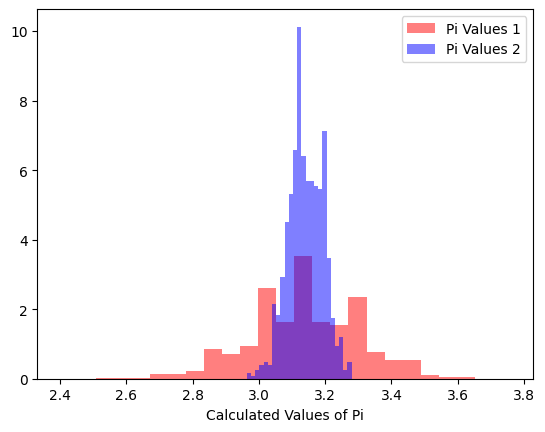

In [22]:
plt.hist(pi_values_1, label = "Pi Values 1", alpha = 0.5, color = "r", density = True, bins = 25)
plt.hist(pi_values_2, label = "Pi Values 2", alpha = 0.5, color = "b", density = True, bins = 25)

plt.xlabel("Calculated Values of Pi")
plt.legend()
plt.show()

## <font color=#46769B>Part (c): Mean value of $\pi$</font>

Your task is to see how your Monte Carlo estimate for $\pi$ approaches the true value as a function of the number of samples.
You will perform *one* simulation and see how a *running estimate* for $\pi$ approaches the true value as you include successively more samples.

Here is the logic to follow:

- Perform a Monte Carlo simulation for $\pi$ with $N = 10^6$.

- Estimate $\pi$ from your simulation *including only the first $n$ samples*.

- Save your results to a list `pi_values`, $(\pi_0, \pi_1, ..., \pi_{N-1})$, where each entry $\pi_{i}$ represents $\pi$ estimated from the first $n=i+1$ samples.

- You will have to estimate $\pi$ for each value of $n$, from $n=1$ to $n=N$.

Once this is done, make a plot of the magnitude of the difference between your successive estimates for $\pi$ and the true value of $\pi$

$$|\pi_{n-1} - \pi_{\rm true}|$$

as a function of the number of samples $n$ that you include. *Make a log-log plot and include axis labels on your plot.*

In [135]:
num = 10 ** 6  # Setting Number of Samples

# Generate random x and y values
x = np.random.uniform(-1, 1, num)
y = np.random.uniform(-1, 1, num)

# Calculate pi values using vectorized operations
z = np.where(x ** 2 + y ** 2 < 1, 1, 0)
pi_values = 4 * np.cumsum(z) / np.arange(1, num + 1) # help from ChatGPT to speed up calculation

print("Pi Values", pi_values)

Pi Values [4.         4.         4.         ... 3.14137028 3.14137114 3.141372  ]


In [132]:
# Your code for part (c) here

num = 10 ** 2 # Setting Number of Samples
pi_values = []

for i in range(num):

    def calculate_pi(num):

        x = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1
        y = np.random.uniform (-1, 1, num) # Generating an Array of a Uniform Distribution between -1 and 1

        n_in = 0 # setting counter

        for i in range(num): # Use a For Loop to check every sample

            xi = x[i]
            yi = y[i]

            if 1 > x[i] ** 2 + y[i] ** 2:
                n_in = n_in + 1

        pi = (4 * n_in) / num
        pi_values.append(pi)
    calculate_pi(num)

print("Pi Values", pi_values)

Pi Values [3.36, 3.08, 3.24, 3.04, 3.28, 3.08, 3.36, 3.16, 3.04, 3.16, 2.92, 3.28, 3.2, 3.2, 3.32, 3.2, 2.96, 3.16, 2.96, 3.08, 3.12, 3.16, 2.88, 3.0, 2.96, 3.28, 3.16, 3.36, 3.04, 3.08, 3.08, 3.36, 3.12, 3.16, 3.24, 3.2, 3.32, 3.04, 3.32, 2.92, 3.2, 3.28, 3.24, 2.84, 3.08, 2.92, 2.96, 3.32, 2.88, 2.92, 2.88, 3.08, 3.08, 2.96, 3.2, 3.12, 3.0, 3.0, 3.36, 3.16, 2.8, 3.16, 3.44, 3.16, 2.92, 2.96, 3.04, 3.08, 3.28, 3.2, 3.2, 3.12, 3.0, 3.04, 3.16, 3.08, 3.0, 3.16, 3.04, 3.24, 3.2, 3.08, 3.04, 2.8, 3.16, 3.44, 3.16, 3.64, 3.24, 3.48, 3.24, 3.16, 3.16, 3.36, 2.96, 3.28, 3.28, 3.24, 3.08, 2.88]


In [133]:
pi_array = []

for i in range(num):
    pi_array.append(np.pi)

def calculate_pi(num):
    delta_pi = []

    for i in range(num): # Use a For Loop to check every sample

        if pi_values > pi_array:
            t = pi_values[i] - pi_array[i]
            delta_pi.append(t)

    return delta_pi

delta_pi_solution = calculate_pi(num)
delta_pi_solution_abs = np.abs(calculate_pi(num))
print("delta Pi", delta_pi_solution_abs)

delta Pi [0.21840735 0.06159265 0.09840735 0.10159265 0.13840735 0.06159265
 0.21840735 0.01840735 0.10159265 0.01840735 0.22159265 0.13840735
 0.05840735 0.05840735 0.17840735 0.05840735 0.18159265 0.01840735
 0.18159265 0.06159265 0.02159265 0.01840735 0.26159265 0.14159265
 0.18159265 0.13840735 0.01840735 0.21840735 0.10159265 0.06159265
 0.06159265 0.21840735 0.02159265 0.01840735 0.09840735 0.05840735
 0.17840735 0.10159265 0.17840735 0.22159265 0.05840735 0.13840735
 0.09840735 0.30159265 0.06159265 0.22159265 0.18159265 0.17840735
 0.26159265 0.22159265 0.26159265 0.06159265 0.06159265 0.18159265
 0.05840735 0.02159265 0.14159265 0.14159265 0.21840735 0.01840735
 0.34159265 0.01840735 0.29840735 0.01840735 0.22159265 0.18159265
 0.10159265 0.06159265 0.13840735 0.05840735 0.05840735 0.02159265
 0.14159265 0.10159265 0.01840735 0.06159265 0.14159265 0.01840735
 0.10159265 0.09840735 0.05840735 0.06159265 0.10159265 0.34159265
 0.01840735 0.29840735 0.01840735 0.49840735 0.098407

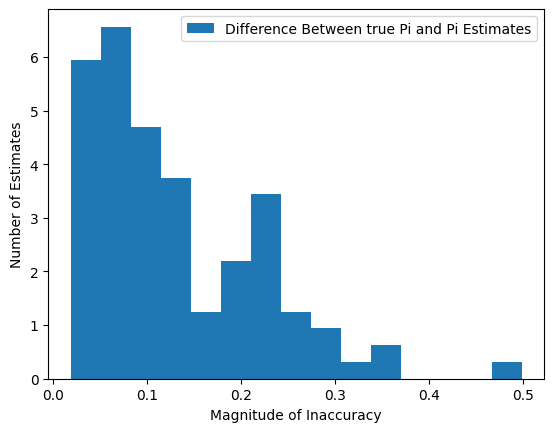

In [134]:
plt.hist(delta_pi_solution_abs, label = "Difference Between true Pi and Pi Estimates", density = True, bins = 15)

# plt.loglog()
plt.xlabel("Magnitude of Inaccuracy")
plt.ylabel("Number of Estimates")
plt.legend()
plt.show()

### <font color=#46769B>Tip</font>

The TAs will evaluate your notebook by running your notebook cells *in order from a new kernel*. So, after you are finished, be sure to double-check that your code will work:

Click __Runtime > Restart session and run all__

Note this was submitted mildly late due to needing to leave the classroom to find an area where my device could be charging throughout completion though the professor stated in class as it is the first assignment it won't be penalized